# 11 Matplotlib

`matplotlib` is **the** plotting library in Python. It's designed after MATLAB's plotting, so lots of things will feel familiar to you. There are different modules in `matplotlib` and they provide different approaches. The `pylab` module provides the most MATLAB like experience. However, the standard module is `pyplot`, which we'll use here. That's kind of like the OOP variant of pylab.

In `matplotlib` there are many ways to customize everything. That means, you can make your plots look like you want them to, but it might take a while and a lot of code. There are wrappers around matplotlib that try to reduce this burden by using sensible defaults or combining different `matplotlib` features. The most prominent one is `seaborn` that tries to use sensible defaults and provide publication-ready figures. There are also other plotting libraries like `plotly` or `bokeh`, but to be honest I never used any of them.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 11.1 Basic plotting functions:

Before we get into axis and figures, `matplotlib` provides a few functions for basic plotting, among them `plot`, `scatter` and `hist`. These can be used very similarly to the equivalents in MATLAB:

The simplest plot would be something like this:

In [ ]:
plt.plot([1,2,3])
#the following is not necessary here, but since it is in other contexts, we might as well add it
plt.show()

Specifying the marker style and color works the same way as in MATLAB:

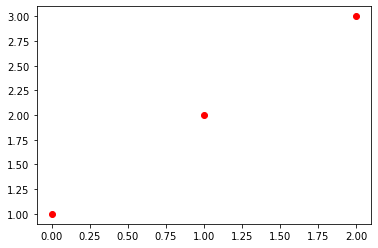

In [6]:
plt.plot([1, 2, 3], 'ro')
plt.show()

**Exercise**

Create a scatter plot of the following arrays with green `+` signs as markers. You can either use `plt.plot` or `plt.scatter` for that. They differ in how you specify the arguments, so have a look at the docstrings (either using the ipython magic `?` or using `help(plt.scatter)`! 

In [14]:
x = np.random.randn(100)
y = x * 2 + np.random.randn(100)
# your code here


## 11.2 Figures, axis and subplots

Just like in MATLAB, we can flexibly create figures. There is a clear distinction between figures and axes and you can create both as objects. Figures are used to arrange axes as subplots. You can directly plot from an axes object. Personally I found the distinction between figures, axes and axis confusing. Especially with the question whether axis or axes is the plural. Oh well. So here's a picture from an old version of the `matplotlib` documentation:

<img src='../img/figure_anatomy.png/'>
          
So basically, I treat axes as subplots and that's good enough. You create axes and figures like this:

```python
fig = plt.figure()
ax = plt.axes()
```

You can also add an axes to an existing figure as a subplot, similar to `subplot` in MATLAB. E.g. if you wanted a 2x2 grid of axes in a figure and add an axis to the lower right position.

```python
fig = plt.figure()
ax = fig.add_subplot(2, 2, 4)
# alternatively:
ax = fig.add_subplot(224)
```

And finally you can create a figure and all the axis that you want in one step:

```python
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
```
In that case the axes are stored in a numpy array. This might be confusing, but if you think about `axes` as a data type, then it's not so much different to have an array of axes or to have an array of integers. It also demonstrates just HOW ubiquitous numpy arrays are in scientific python. There are more flexible ways to create irregular arrangements of subplots (e.g. not the same number of columns per row). But for now regular subplots are good enough!

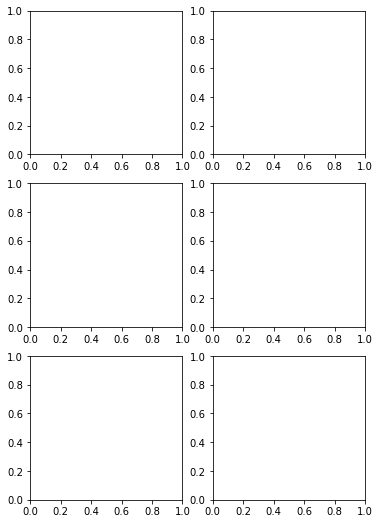

type(axs) = <class 'numpy.ndarray'>
axs.shape = (3, 2)


In [42]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(6, 9)) # width come first in the figsize
plt.show()
print(f"{type(axs) = }") # really cool f-string feature that I just learned about
print(f"{axs.shape = }")

There is the possibility of overlapping ticks or labels. If you want to avoid that, you can give another argument. The following doesn't look too different, but it CAN make a huge difference.


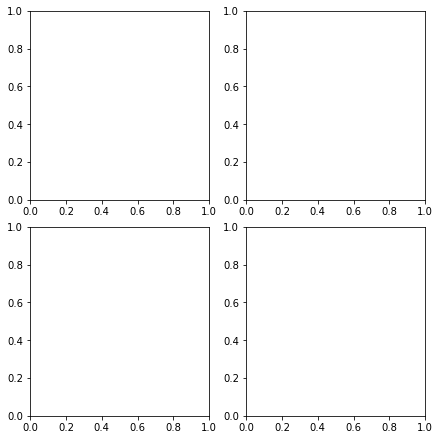

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), constrained_layout=True)

As I said before, you can also plot from an axis object. This is very useful in complicated subplots. The syntax is the same as plotting from the `pyplot` module, except that you call the respective method from the axis object.

I.e. this

```python
plt.plot([1, 2, 3])
```

generates the same output as this:

```python
ax = plt.axes()
ax.plot([1, 2, 3])
```

The first method creates an `axes` if there is none to plot into. The second approach has the advantage that you always plot into the correct `axes`. Being explicit is a good thing, so I would advise you to explicitly create figures and axes as needed.

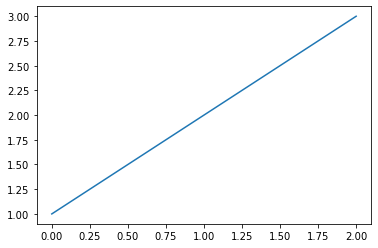

In [51]:
ax = plt.axes()
ax.plot([1, 2, 3])

If the axes are in an array, you can retrieve the single axes from it via regular numpy indexing:

<BarContainer object of 3 artists>

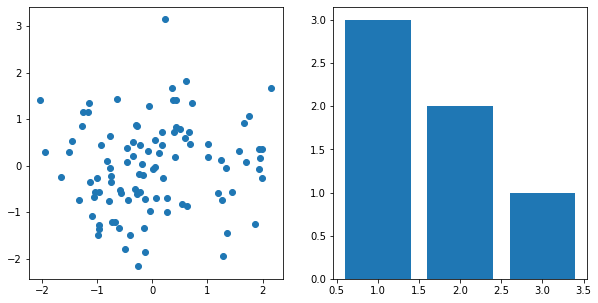

In [60]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].scatter(np.random.randn(100), np.random.randn(100))
axs[1].bar([1, 2, 3], [3, 2, 1])

**Exercise**

Create a figure with two subplots. Plot the `sin` and `cosin` from 0 to 2 * pi in the two axis. I'll provide the necessary functions and constants and give you an example on how to plot a function below:

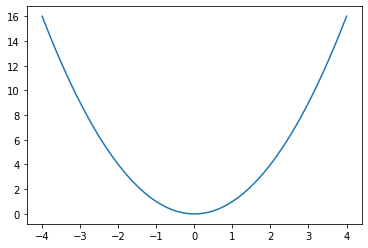

In [18]:
x = np.linspace(-4, 4, 1000)
y = x ** 2
plt.plot(x, y)

In [19]:
pi, sin, cos = np.pi, np.sin, np.cos
# your code here


## 11.3 Titles, labels and legends

The next thing you probably want to do is add descriptions to the figure. We'll focus on the case of a single axes object here. The same works for multiple subplots and in addition you can give an overarching title for the whole figure with `fig.suptitle`.

### Giving a title

You can add a title to an axes using the `ax.set_title` method:

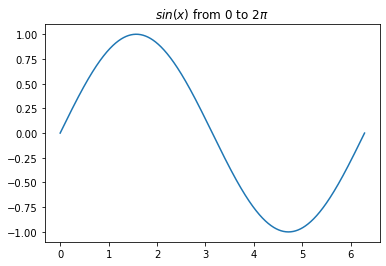

In [72]:
ax = plt.axes()
x = np.linspace(0, 2 * pi, 1000)
ax.plot(x, np.sin(x))
ax.set_title('$sin(x)$ from 0 to 2$\pi$'); # you can add chunks of LaTeX in between $ signs

As usual the methods I show you are *a lot* more flexible if you give the correct arguments. Here I show you how to change the position and size of the title, but there is a lot more that you could change.

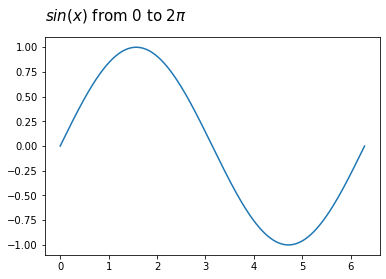

In [88]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set_title(
    '$sin(x)$ from 0 to 2$\pi$', # you can add chunks of LaTeX in between $ signs
    fontsize=15, 
    y=1.05, 
    loc='left',
); 

### Specifying axis labels

We all know that we should label our axis. Luckily that is quite simple:

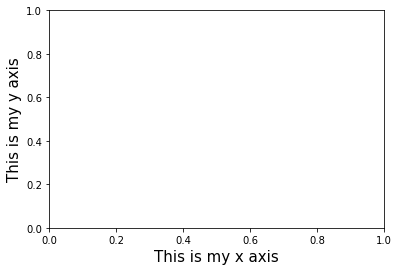

In [20]:
ax = plt.axes()
ax.set_xlabel('This is my x axis', fontsize=15)
ax.set_ylabel('This is my y axis', fontsize=15);

### Legends and labels

There are multiple ways to add a legend to a figure. I'll show you my favorite way. Instead of linking description and the elements that we want those descriptions to refer to post hoc, we'll assign the descriptions while plotting as `label`. Then the `.legend` method knows which description belongs to which element of the plot:

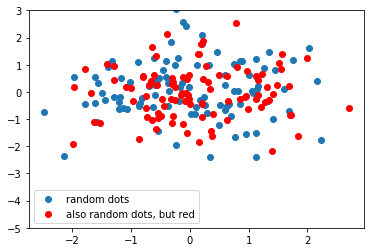

In [22]:
ax = plt.axes()
ax.scatter(np.random.randn(100), np.random.randn(100), label="random dots")
ax.scatter(np.random.randn(100), np.random.randn(100), c="r", label="also random dots, but red")
ax.set_ylim(-5, 3) # make some room in the figure for the legend
ax.legend()

**Exercise**

Add appropriate axis labels, a title and a legend to the plot below. That requires you to change the cell.

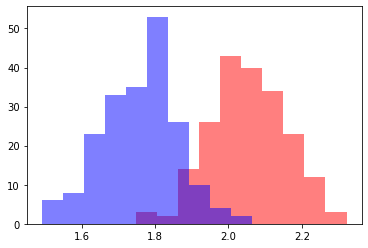

In [25]:
# change this cell!
height_netherlands = 2.05 + np.random.randn(200) * .10
height_germany = 1.75 + np.random.randn(200) * .10
ax = plt.axes()
ax.hist(height_netherlands, color="r", alpha=.5) # alpha specifies the opacity 
ax.hist(height_germany, color="b", alpha=.5); # this is useful if you want to plot overlapping elements into the same axes

## 11.4 Saving figures

This is the last point in this notebook. When you have created a figure with subplots and plotted all your amazing results, how do you store them? As you will have noticed, `pyplot` has a rather strong OOP aspect. So naturally, storing a figure is possible from a method of the figure class!

In [105]:
fig = plt.figure()
fig.savefig?

<Figure size 432x288 with 0 Axes>

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no ext

Let's rerun the previous plot, but this time we make it part of a figure:

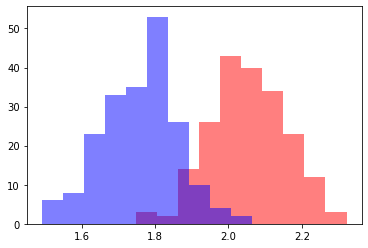

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(height_netherlands, color="r", alpha=.5)
ax.hist(height_germany, color="b", alpha=.5);

**Exercise**

Save the figure!

In [112]:
# your code here


**Project Exercise 6**

Assuming we actually made it all the way to here and we've done all other exercises on the way, it's time for the last assignment!

## 11.5 Conclusion

This should be enough to get you started with matplotlib. Just a quick heads-up: There is an insane amount of finetuning that you could do with matplotlib. So be prepared to look up a lot of stuff in google. More than you usually do during programming. The good news is that you almost always find a good blog entry or a question on stackoverflow that answers exactly that question.